In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

## Extract

In [2]:
df = pd.read_csv('CCEE_BR_Data_DEC_2020_v3.csv', encoding='UTF-8')
tamanho = df.shape
df

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
0,01/01/2018,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0,0
1,01/01/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0,0
2,01/01/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0,0
3,01/01/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,SP,0,0
4,01/01/2018,Autoprodutor,ALIMENTÍCIOS,SUL,PR,2,0
...,...,...,...,...,...,...,...
634883,12/15/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,SP,11647,1
634884,12/15/2020,Distribuidor,ACR,SUL,PR,2775,1
634885,12/15/2020,Distribuidor,ACR,SUL,RS,2978,1
634886,12/15/2020,Distribuidor,ACR,SUL,SC,2465,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634888 entries, 0 to 634887
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Data        634888 non-null  object
 1   Classe      634888 non-null  object
 2   Ramo        634888 non-null  object
 3   Submercado  634888 non-null  object
 4   UF          634888 non-null  object
 5   Consumo     634888 non-null  int64 
 6   Covid       634888 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 33.9+ MB


## Transform

### Entendendo a formatação da data

In [4]:
df['Data'].value_counts()

12/15/2020    650
11/11/2020    650
11/21/2020    650
11/20/2020    650
11/19/2020    650
             ... 
1/28/2018     539
1/29/2018     539
1/30/2018     539
1/31/2018     539
01/01/2018    539
Name: Data, Length: 1080, dtype: int64

In [5]:
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True)

<Axes: xlabel='Data', ylabel='Count'>

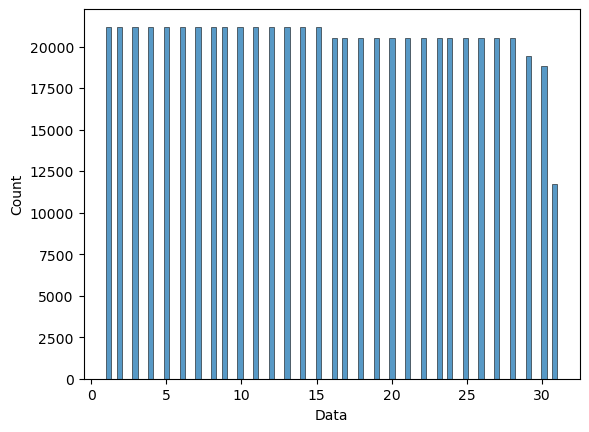

In [6]:
# Conferindo a distribuição de dias
dia = df['Data'].dt.day
sns.histplot(data = df, x = dia)

### Explorando os dados do Ramo

In [7]:
df['Ramo'].value_counts()

SERVIÇOS                          69540
MINERAIS NÃO-METÁLICOS            67620
ALIMENTÍCIOS                      58485
MANUFATURADOS DIVERSOS            49292
QUÍMICOS                          44988
METALURGIA E PRODUTOS DE METAL    43826
COMÉRCIO                          41487
BEBIDAS                           39993
MADEIRA  PAPEL E CELULOSE         37286
TÊXTEIS                           36983
TELECOMUNICAÇÕES                  29572
ACR                               28080
VEÍCULOS                          27701
EXTRAÇÃO DE MINERAIS METÁLICOS    22786
SANEAMENTO                        20056
TRANSPORTE                        17193
Name: Ramo, dtype: int64

In [8]:
# Padronizando as classes
df['Ramo'] = df['Ramo'].str.capitalize()

# Corrigindo a formatação da classe madeira papel e celulose
df['Ramo'] = df['Ramo'].replace('Madeira  papel e celulose', 'Madeira, papel e celulose')

df['Ramo'].value_counts()

Serviços                          69540
Minerais não-metálicos            67620
Alimentícios                      58485
Manufaturados diversos            49292
Químicos                          44988
Metalurgia e produtos de metal    43826
Comércio                          41487
Bebidas                           39993
Madeira, papel e celulose         37286
Têxteis                           36983
Telecomunicações                  29572
Acr                               28080
Veículos                          27701
Extração de minerais metálicos    22786
Saneamento                        20056
Transporte                        17193
Name: Ramo, dtype: int64

### Explorando os dados de covid por ramo

In [9]:
df['Covid'].groupby(df['Ramo']).sum()

Ramo
Acr                                6916
Alimentícios                      15283
Bebidas                           10337
Comércio                          10928
Extração de minerais metálicos     6187
Madeira, papel e celulose          9767
Manufaturados diversos            13202
Metalurgia e produtos de metal    11963
Minerais não-metálicos            17619
Químicos                          11681
Saneamento                         6759
Serviços                          18573
Telecomunicações                   7638
Transporte                         5274
Têxteis                            9842
Veículos                           7585
Name: Covid, dtype: int64

### Explorando os dados do submercado

In [10]:
df['Submercado'].value_counts()

SUDESTE / CENTRO-OESTE    276126
NORDESTE                  166832
SUL                       106248
NORTE                      85682
Name: Submercado, dtype: int64

In [11]:
# Corrigindo a formatação
df['Submercado'] = df['Submercado'].str.title()

df['Submercado'].value_counts()

Sudeste / Centro-Oeste    276126
Nordeste                  166832
Sul                       106248
Norte                      85682
Name: Submercado, dtype: int64

### Explorando os dados de UF

In [12]:
# Identificando os valores únicos de UF
df['UF'].unique()

array(['PE\xa0', 'MT', 'MG', 'SP', 'PR', 'RS', 'SC', 'RJ', 'MA', 'PA',
       'ES', 'BA\xa0', 'MS', 'CE', 'AL\xa0', 'PB', 'RN', 'SE', 'DF\xa0',
       'GO', 'PI', 'TO', 'AC', 'RO', 'AM', 'AP'], dtype=object)

In [13]:
#Corrigindo a codificação para utf-8 manual
df['UF'] = df['UF'].replace({'PE\xa0':'PE',
                            'DF\xa0':'DF',
                            'AL\xa0':'AL',
                            'BA\xa0':'BA'})

# Corrigindo as regiões referentes a UF
sudoeste = ['SP', 'RJ', 'MG', 'ES']
centro_oeste = ['GO', 'MT', 'MS', 'DF']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
norte = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']

df.loc[df['UF'].isin(sudoeste), 'Submercado'] = 'Sudeste'
df.loc[df['UF'].isin(centro_oeste), 'Submercado'] = 'Centro-Oeste'
df.loc[df['UF'].isin(nordeste), 'Submercado'] = 'Nordeste'
df.loc[df['UF'].isin(norte), 'Submercado'] = 'Norte'

In [14]:
df['Submercado'].value_counts()

Nordeste        189654
Sudeste         160709
Sul             106248
Centro-Oeste     97771
Norte            80506
Name: Submercado, dtype: int64

### Explorando os dados de covid

In [15]:
df['Covid'].value_counts()

0    465334
1    169554
Name: Covid, dtype: int64

In [16]:
df[(df['Covid']==1)]

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
465334,2020-03-25,Autoprodutor,Alimentícios,Nordeste,PE,0,1
465335,2020-03-25,Autoprodutor,Alimentícios,Centro-Oeste,MT,2,1
465336,2020-03-25,Autoprodutor,Alimentícios,Sudeste,MG,0,1
465337,2020-03-25,Autoprodutor,Alimentícios,Sul,PR,2,1
465338,2020-03-25,Autoprodutor,Alimentícios,Sul,RS,1,1
...,...,...,...,...,...,...,...
634883,2020-12-15,Distribuidor,Acr,Sudeste,SP,11647,1
634884,2020-12-15,Distribuidor,Acr,Sul,PR,2775,1
634885,2020-12-15,Distribuidor,Acr,Sul,RS,2978,1
634886,2020-12-15,Distribuidor,Acr,Sul,SC,2465,1


Com base nos valores binários e comparação com as datas, valores 0 correspondem a época anterior ao covid e 1 durante.

## Extract

In [17]:
df = df.to_csv('CCEE_BR_1.csv', index=False)
df